##**David Alejandro Vásquez Franco**

##**CC 1000921301**

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_09_Desicion_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio

1. Importar iris dataset
2. Generar una intuición respecto a iris dataset. Ver laboratorio anterior.
3. Dividir el *dataset* empleanto el metodo train_test_split de sklearn
4. Dentro de sklearn, aplicar el algoritmo DecisionTreeClassifier.
5. Para el clasificador analice el gráfico de desición:

```

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
  graph=tree.plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

```

6. Características importantes.

```
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()
```

7. Fronteras de desición.



```
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()
```


In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree


# **Solución**

## **1. Importar iris dataset**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [4]:
# Cargamos el dataset Iris
iris = load_iris()

# Lo convertimos a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(f"Dimensiones: {df.shape}")
display(df.head())

Dimensiones: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **2. Generar una intuición respecto a iris dataset. Ver laboratorio anterior.**

In [5]:
# Esto centra los datos en 0 y ajusta la varianza
scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris.data)

# DataFrame con los datos escalados
data = pd.DataFrame(data=data_scaled, columns=iris.feature_names)

# Columna objetivo
data['target'] = iris.target

# Convertimos a formato "Capitalize"
columns_name = ["".join([c.capitalize() for c in col.split()]) for col in data.columns]
columns_name = [col.replace("(", "_") for col in columns_name]
cols = [col.replace(")", "") for col in columns_name]

# Renombramos el DataFrame
data.columns = cols

display(data.head())

print("\nEstadísticas después de estandarizar (Mean ~ 0, Std ~ 1):")
display(data.describe().round(2))

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0



Estadísticas después de estandarizar (Mean ~ 0, Std ~ 1):


,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
count,150.00,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00,1.00
std,1.00,1.00,1.00,1.00,0.82
min,-1.87,-2.43,-1.57,-1.45,0.00
25%,-0.90,-0.59,-1.23,-1.18,0.00
50%,-0.05,-0.13,0.34,0.13,1.00
75%,0.67,0.56,0.76,0.79,2.00
max,2.49,3.09,1.79,1.71,2.00


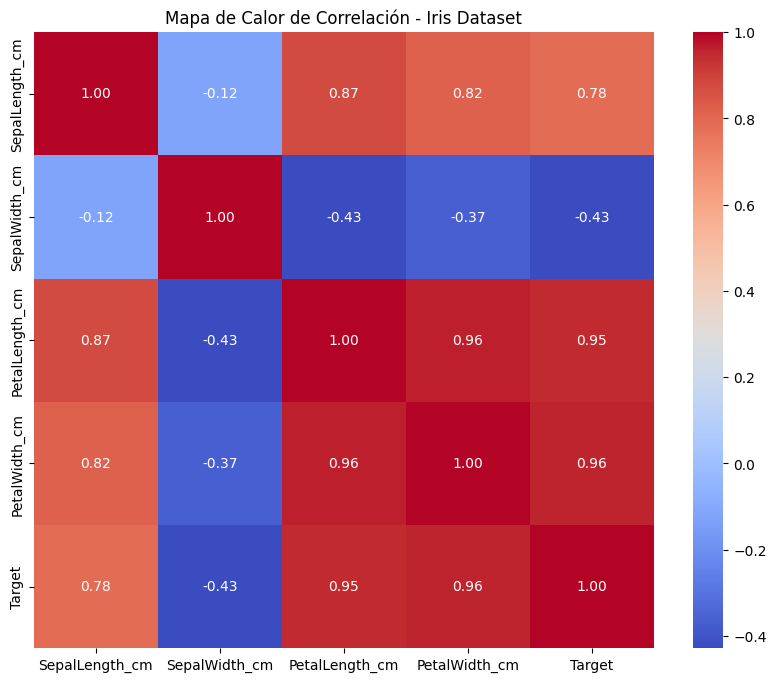


--- Matriz de Correlación Numérica ---
                SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  \
SepalLength_cm        1.000000      -0.117570        0.871754       0.817941   
SepalWidth_cm        -0.117570       1.000000       -0.428440      -0.366126   
PetalLength_cm        0.871754      -0.428440        1.000000       0.962865   
PetalWidth_cm         0.817941      -0.366126        0.962865       1.000000   
Target                0.782561      -0.426658        0.949035       0.956547   

                  Target  
SepalLength_cm  0.782561  
SepalWidth_cm  -0.426658  
PetalLength_cm  0.949035  
PetalWidth_cm   0.956547  
Target          1.000000  


In [6]:
# Calculamos y graficamos la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Mapa de Calor de Correlación - Iris Dataset")
plt.show()

print("\n--- Matriz de Correlación Numérica ---")
print(data.corr())

## **3. Dividir el dataset empleanto el metodo train_test_split de sklearn**

In [7]:
# Configuramos el Split Estratificado
# n_splits=1: Una sola división
# test_size=0.2: 20% para test, 80% para train
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Ejecutamos la división usando la columna 'Target'
for train_index, test_index in split.split(data, data["Target"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Separamos las características (X) y la etiqueta (y)
X_train = strat_train_set.drop("Target", axis=1)
y_train = strat_train_set["Target"]

X_test = strat_test_set.drop("Target", axis=1)
y_test = strat_test_set["Target"]

print(f"Tamaño de Entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño de Prueba (X_test): {X_test.shape}")

Tamaño de Entrenamiento (X_train): (120, 4)
Tamaño de Prueba (X_test): (30, 4)


## **4. Dentro de sklearn, aplicar el algoritmo DecisionTreeClassifier.**

In [8]:
# max_depth=3: Evita que el árbol sea demasiado complejo
# random_state=42: Para que siempre salga el mismo árbol
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenamos usando los datos que separamos en el Punto 3
tree_clf.fit(X_train, y_train)

print(f"Profundidad del árbol: {tree_clf.get_depth()}")
print(f"Número de hojas: {tree_clf.get_n_leaves()}")

Profundidad del árbol: 3
Número de hojas: 5


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hacemos las predicciones con el set de prueba
y_pred = tree_clf.predict(X_test)

# Métricas
print("Accuracy (Exactitud):", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy (Exactitud): 0.9666666666666667

Matriz de confusión:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## **5. Para el clasificador analice el gráfico de desición [...]**

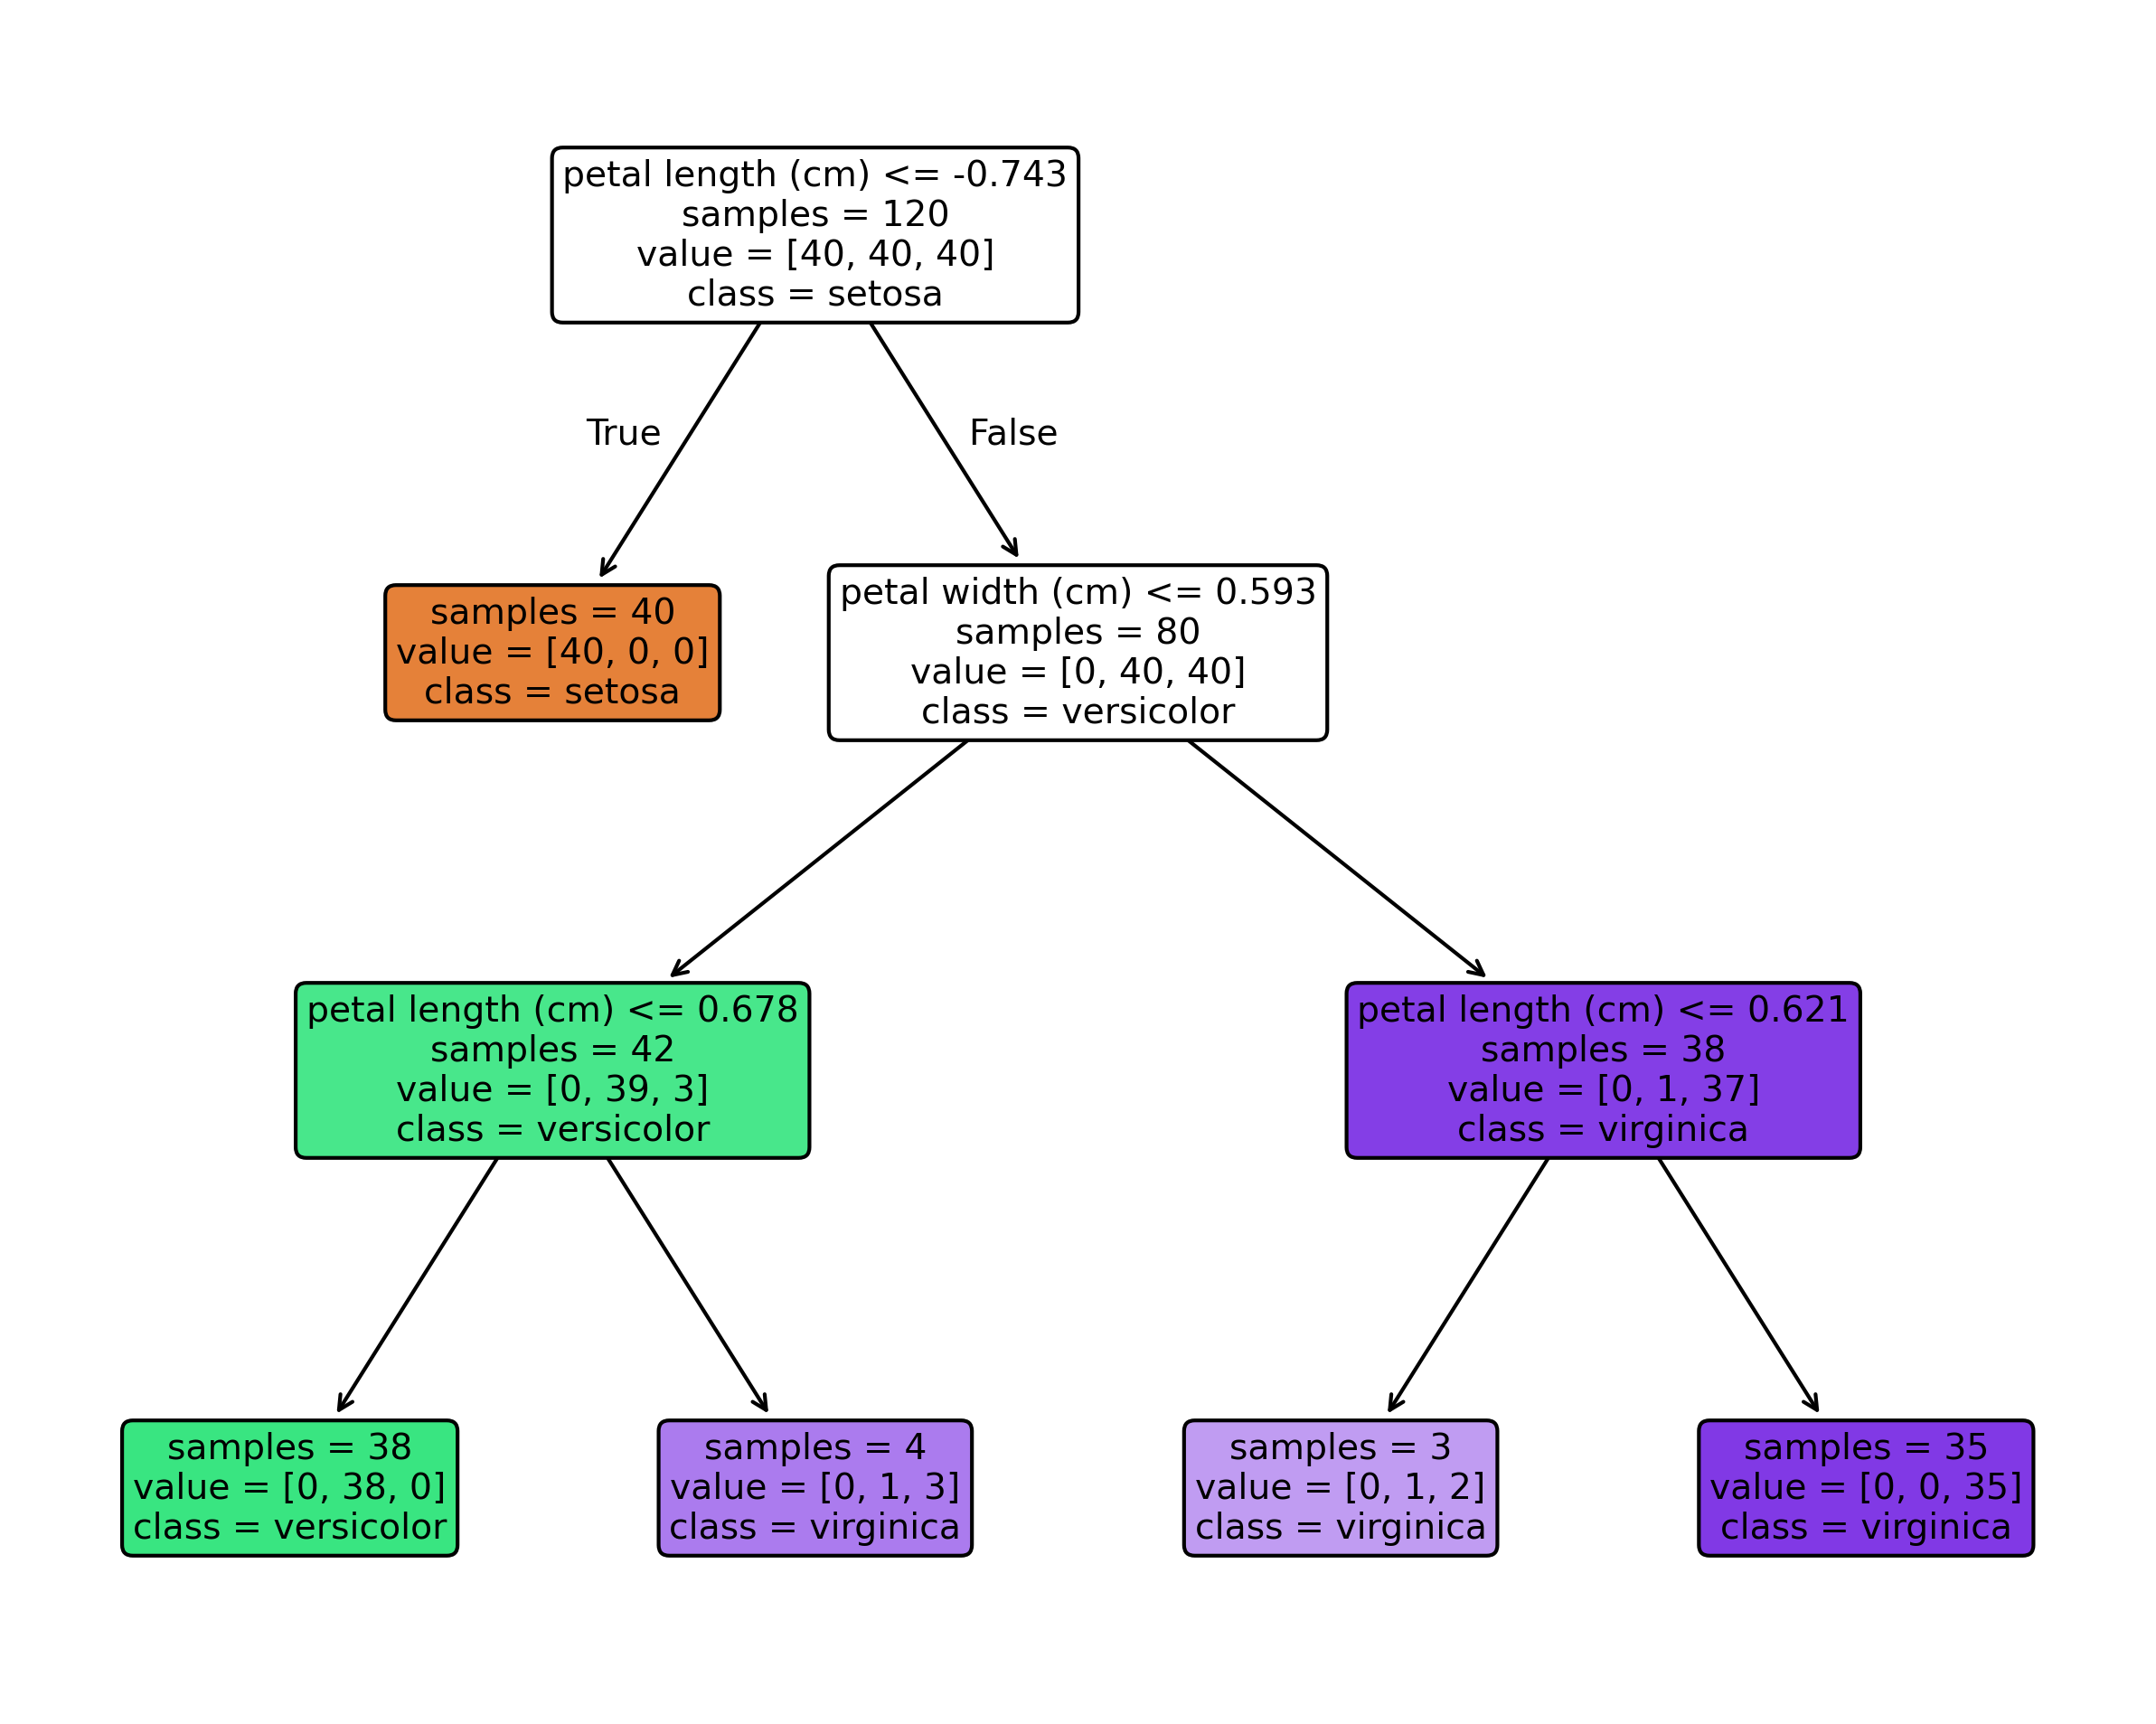

In [10]:
# Gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)

# Árbol
# class_names: los nombres de las flores (iris.target_names)
# feature_names: los nombres de las columnas (iris.feature_names)
tree.plot_tree(tree_clf,
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=False,  # Oculta el valor "gini" para limpiar la vista
               filled=True,     # Pinta los cuadros por colores de clase
               rounded=True)    # Bordes redondeados (estético)

plt.show()

## **6. Características importantes.**

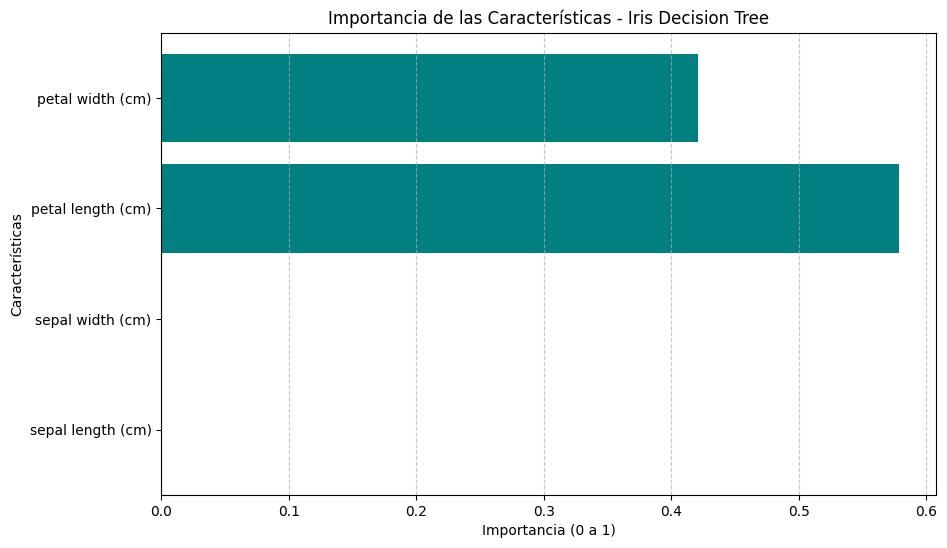

sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.5791
petal width (cm): 0.4209


In [11]:
# Importancia calculada por el modelo
importancia = tree_clf.feature_importances_
n_caracteristicas = iris.data.shape[1]

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(n_caracteristicas), importancia, color='teal')

# Usamos iris.feature_names para tener los nombres originales (o data.columns[:-1])
plt.yticks(np.arange(n_caracteristicas), iris.feature_names)

plt.xlabel('Importancia (0 a 1)')
plt.ylabel('Características')
plt.title('Importancia de las Características - Iris Decision Tree')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Mostramos los valores exactos
for name, score in zip(iris.feature_names, importancia):
    print(f"{name}: {score:.4f}")

## **7. Fronteras de desición.**

/tmp/ipython-input-3456677873.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3456677873.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3456677873.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3456677873.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-3456677873.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


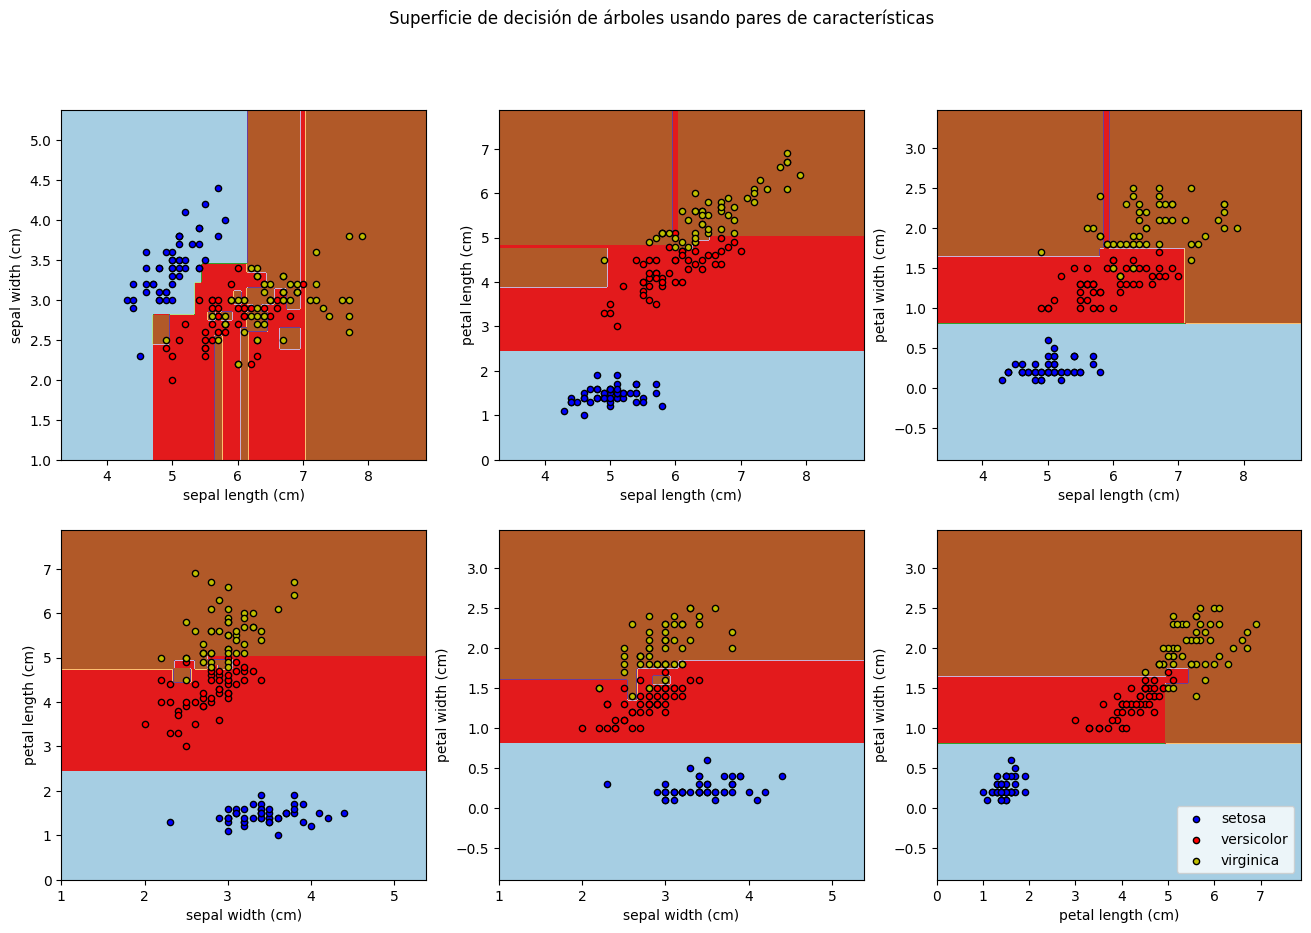

In [12]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Cargamos Iris
iris = load_iris()

plt.figure(figsize=(16, 10))

# Iteramos sobre todos los pares posibles de características
# [0,1] = Sépalo Largo vs Ancho, [0,2] = Sépalo Largo vs Pétalo Largo, etc.
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    # Entrenamos un árbol específico solo con estas 2 variables
    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    # Creamos una malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Predecimos para cada punto de la malla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Pintamos la frontera
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Puntos reales de entrenamiento encima
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=20)

plt.suptitle("Superficie de decisión de árboles usando pares de características")
plt.legend(loc='lower right')
plt.show()